# 최소제곱법 (Least Ordinary Squares)

최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법(method of least squares, least squares approximation)은 **어떤 계의 해방정식을 근사적으로 구하는 방법**으로, 근사적으로 구하려는 해와 **실제 해의 오차의 제곱의 합이 최소가 되는 해**를 구하는 방법이다.

잔차(Residual, Error)제곱의 합이 0에 가깝게 되도록 기울기(Weight)와 편향(bias)을 찾는다.

**장점**

- 간단하게 식을 유도할 수 있다.


**한계**

- 노이즈(outlier)에 취약하다.
- 특징 변수와 샘플 건수에 비례해서 계산 비용이 높다.

**RSS(Residual Sum of Square)** 공식

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$y = wx + b$일때,

* $w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

* $b = \bar{y} - a\bar{x}$

## 샘플 데이터를 생성

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 50개의 X를 생성합니다.
x = np.arange(50)

# a=기울기, b=절편
a = 0.3
b = 0.8

# 선형회귀 식을 작성합니다. y 값을 산출합니다.
y = a * x + b

위의 수식에 근거하여 y 데이터 생성시 일직선으로 표현되는 단순한 선형함수가 완성되므로, **약간의 노이즈를 추가**한다.

In [2]:
noise = np.random.uniform(-1.05, 1.05, size=y.shape)

In [3]:
# y 값에 노이즈를 추가합니다.
yy = y + noise

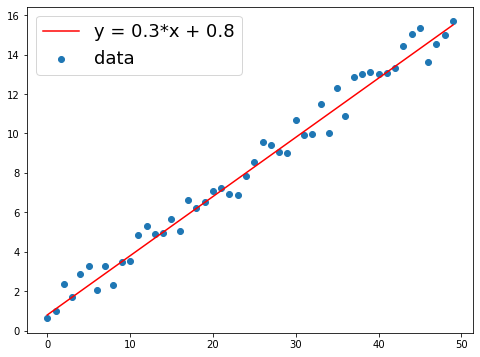

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='r', label='y = 0.3*x + 0.8')
plt.scatter(x, yy, label='data')
plt.legend(fontsize=18)
plt.show()

## 샘플 데이터 생성 코드를 함수로 만들기

In [5]:
def make_linear(w=0.5, b=0.8, size=50, noise=0.05): 
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

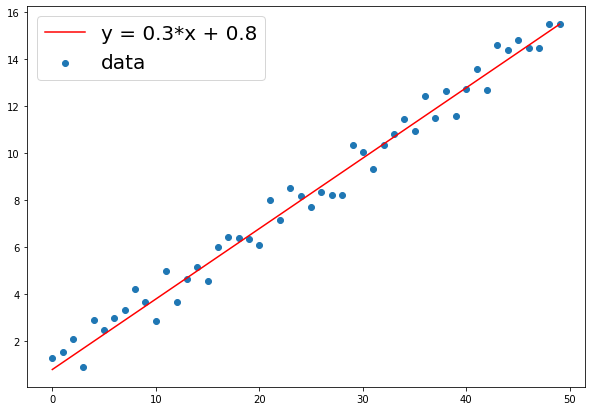

w: 0.3, b: 0.8


In [6]:
x, y = make_linear(size=50, w=0.3, b=0.8, noise=1.05)

## Python 코드로 구현

### 최소제곱법 (Least Square) 공식

**RSS(Residual Sum of Square)**

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$y = wx + b$일때,

- $w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

- $b = \bar{y} - a\bar{x}$

### x_bar(x 평균), y_bar (y 평균) 구하기

In [7]:
x_bar = x.mean()
y_bar = y.mean()

### w의 계수 값 찾기

$w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

In [8]:
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight)) 

w: 0.30


### b의 계수 값 구현

$b = \bar{y} - w\bar{x}$

In [9]:
calculated_bias = y_bar - calculated_weight * x_bar

In [10]:
print('b: {:.2f}'.format(calculated_bias))

b: 0.99


최소제곱법은 **노이즈에 취약하다는 단점**이 있다.

이를 직접 눈으로 확인해 보도록 하자.

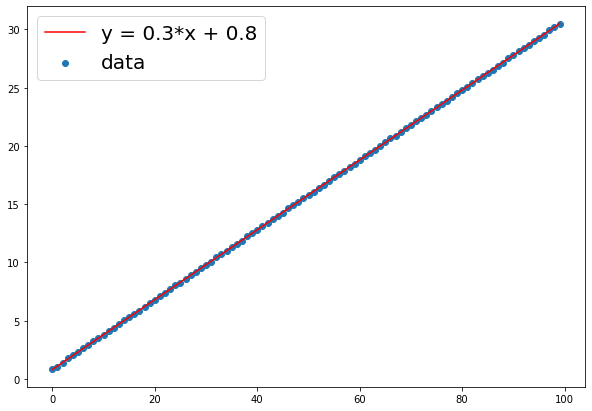

w: 0.3, b: 0.8


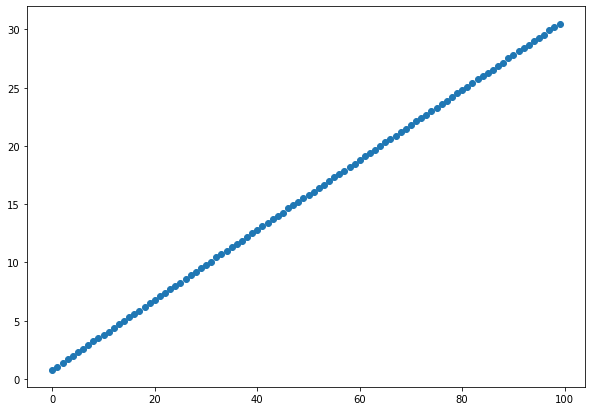

In [18]:
x, y = make_linear(size=100, w=0.3, b=0.8, noise=0.05)


#y[5]=60
#y[10]=60

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [12]:
'''
노이즈를 죽이고 이상치값을 실제값에 추가하고... w,b를 최소제곱법으로 구했더니
값이 무너지는 결과를 확인, 특히 bias에서 값이 완전히 다르게 출력
최소제곱법은 노이즈, 이상치값에 아주 민감하게 반응하는 약점을 가짐

전체 데이터의 평균을 구하는 것이 핵심인데, 이상치값은 평균을 엄청나게 올리거나 낮추는 요인이기 때문에
이상치값은 전체 회귀모델의 성능을 낮추는 요인이 된다.
'''
x_bar = x.mean()
y_bar = y.mean()
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
calculated_bias = y_bar - calculated_weight * x_bar

print('w: {:.2f}, b: {:.2f}'.format(calculated_weight, calculated_bias))

w: 0.24, b: 4.78


위의 결과에서도 볼 수 있듯이, `outlier`에 취약.

근본적으로 x, y의 평균 값을 활용하여 기울기 (w)와 절편 (b)를 구하게 될 때, outlier가 크게 영향을 끼치는 것을 볼 수 있다.

## 최소제곱법 (OLS)를 활용한 LinearRegression 

#### scikit-learn 패키지의 `LinearRegression`이 바로 최소 제곱 추정 방식으로 회귀 예측 알고리즘

In [13]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(x.reshape(-1,1), y)

LinearRegression()

In [21]:
print('W', model.coef_)
print('b', model.intercept_)

W [0.29997934]
b 0.7982753553582285


In [22]:
x.shape, x.reshape(-1, 1).shape

((100,), (100, 1))